In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [34]:
# Valores de las acciones de APPLE y Microsoft de los últimos 6 meses (2020-2021)

apple = np.asanyarray([float(value.replace(',', '.')) for value in reversed(pd.read_csv("AAPL.csv")['Último'].values)])
microsoft = np.asanyarray([float(value.replace(',', '.')) for value in reversed(pd.read_csv("MSFT.csv")['Último'].values)])

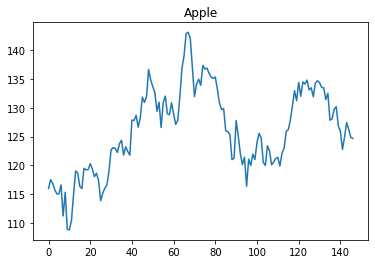

In [35]:
plt.plot(apple)
plt.title("Apple")
plt.show()

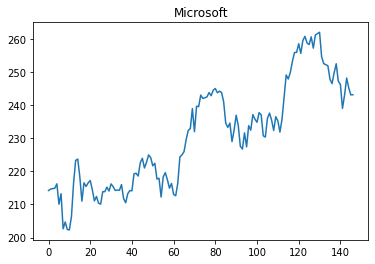

In [36]:
plt.plot(microsoft)
plt.title("Microsoft")
plt.show()

### Obtener la media y el desvio de cada set de datos

In [38]:
def size_mean_std(data):
    size = len(data)
    
    mean = np.mean(data)       
    rango = np.quantile(data, 0.975) - np.quantile(data, 0.025)
    std = rango / 4
    
    return size, mean, std

In [41]:
n1, x1, std1 = size_mean_std(apple)
print(n1, x1, std1)

147 126.08959183673468 6.263874999999995


In [42]:
n2, x2, std2 = size_mean_std(microsoft)
print(n2, x2, std2)

147 230.67843537414967 13.70112499999999


### Evaluar si las acciones de apple y microsoft se comportan igual relativo al precio de cierre con un grado de confianza del 95%

In [45]:
# grados de libertad
df = n1 + n2 - 2

alfa = 0.05

from scipy.stats import t
T_critico = t.ppf(1-alfa/2, df=df)
T_critico

1.96812140700927

In [49]:
S_combinada = ((n1-1)*std1**2 + (n2-1)*std2**2) / df
print("S_combinada:", S_combinada)

SEdif = np.sqrt(S_combinada*((1/n1) + (1/n2)))
print("SEdif:", SEdif)

IC_min = abs((x1-x2)) - T_critico * SEdif
IC_max = abs((x1-x2)) + T_critico * SEdif
print("IC_min:", IC_min)
print("IC_max:", IC_max)



S_combinada: 113.47847814062483
SEdif: 1.242547734560553
IC_min: 102.1433587417955
IC_max: 107.03432833303448


In [48]:
# Esta el cero contenido en el intervalo IC_MIN IC_MAX
if(IC_min <= 0 and IC_max >= 0):
    print("Si, son similares las medias de las acciones")
else:
    print("No, no son similares las medias de las acciones")

No, no son similares las medias de las acciones
